Part I
---


| Var | (a, sigma^2) | n | q | k | Rule | Law |
| --- | --- | --- | --- | --- | --- | --- |
| 5 | (0;9) | 60 | 1.75 | 3 | Стерджеса | Треугольное на отрезке (-2, 4) и модой, равной 1 |


In [235]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts
import pandas as pd
import math
import statistics

n = 60
a = 0
sigma = 3
q = 1.75

left = -2
right = 4
mode = 1

Task 1


In [236]:
# sample = sts.norm.rvs(loc=a, scale=sigma, size=n)
sample = np.random.triangular(left, mode, right, size=n)
print(sample)

[-1.01230003  3.57791711  0.82346309  2.30884796  3.51205106 -0.12148471
  2.81670718  2.80220157 -1.21826401  2.30777001  0.96079822  1.12035699
  1.11928037  3.50093891  2.12053606  2.76343691  1.31517512 -0.78758207
  0.12329339 -0.33391496  2.32179382  2.72589096  0.58794078  3.40875131
  2.54559835  1.08826624  3.1447585  -0.4351161   0.83354666  2.23274166
  1.79323099  1.1147473   0.59046065 -0.42456597  0.87771364  1.54749641
  2.5618382   1.79951315  2.29956265 -1.32381719  2.11782427  0.78530057
  1.74521419  0.68380892 -0.63223765 -1.06562476 -0.05461964 -0.2196759
  1.40549726  1.4758138   2.5029657  -0.2198422   1.52565349 -0.29646089
  1.1062142   2.93987795  0.14469666 -0.9283816   1.61009747  2.47529889]


In [237]:
n_intervals = int(1 + 3.32*math.log10(n))+1
min_smpl = math.floor(sample.min())
max_smpl = math.ceil(sample.max())
h = (max_smpl-min_smpl)/n_intervals

print(n_intervals, min_smpl, max_smpl, h)


7 -2 4 0.8571428571428571


In [238]:
intervals = []
for i in range(0, n_intervals):
    print(f'{i+1} interval: {min_smpl+i*h} - {min_smpl+(i+1)*h}')
    intervals.append(min_smpl+i*h)
intervals.append(min_smpl+n_intervals*h)


1 interval: -2.0 - -1.1428571428571428
2 interval: -1.1428571428571428 - -0.2857142857142858
3 interval: -0.2857142857142858 - 0.5714285714285712
4 interval: 0.5714285714285712 - 1.4285714285714284
5 interval: 1.4285714285714284 - 2.2857142857142856
6 interval: 2.2857142857142856 - 3.1428571428571423
7 interval: 3.1428571428571423 - 4.0


In [239]:
frequency = []
arraySort = list(sample)
arraySort.sort()
for i in range(0, len(intervals)-1):
    frequency.append(0)
    for j in arraySort:
        if j >= intervals[i] and j <= intervals[i+1]:
            frequency[i] += 1
for i in range(0, len(frequency)):
    print(f'{i+1} interval: {frequency[i]}')
frequency = np.array(frequency)

print(f'\nСумма относительных частот - {(frequency/n).sum()}')



1 interval: 2
2 interval: 9
3 interval: 6
4 interval: 15
5 interval: 10
6 interval: 13
7 interval: 5

Сумма относительных частот - 1.0


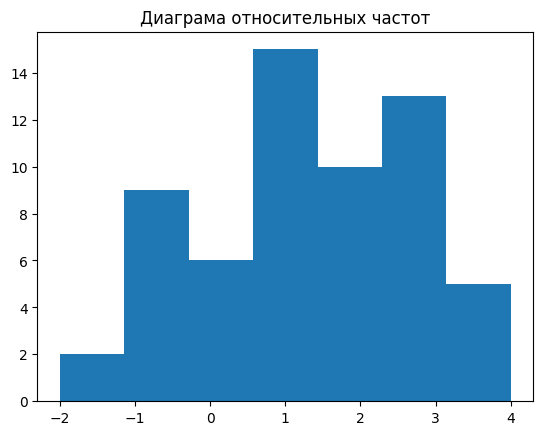

In [240]:
plt.title("Диаграма относительных частот")
plt.stairs(frequency, intervals, fill=True)

In [241]:
my_pdf = frequency/(h*n)
for i in range(0, len(my_pdf)):
    print(f'{i+1} interval: {my_pdf[i]}')
# print(f'Сумма абсолютных частот {tmp.sum()}')

1 interval: 0.03888888888888889
2 interval: 0.17500000000000002
3 interval: 0.11666666666666668
4 interval: 0.2916666666666667
5 interval: 0.19444444444444448
6 interval: 0.2527777777777778
7 interval: 0.09722222222222224


[0.03888889 0.175      0.11666667 0.29166667 0.19444444 0.25277778
 0.09722222]
1.1666666666666667


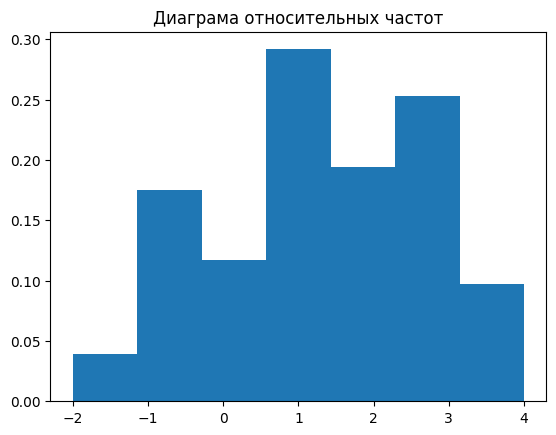

In [242]:
plt.title("Диаграма относительных частот")
plt.stairs(my_pdf, intervals, fill=True)
print(my_pdf)
print(my_pdf.sum())

Task 2

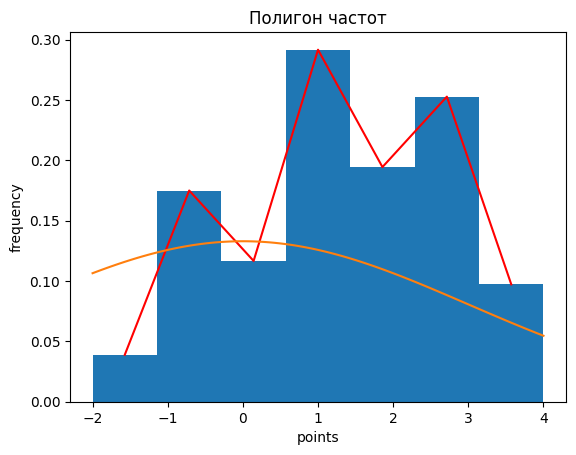

In [243]:
lineY = []
for i in my_pdf:
    lineY.append(i)
lineX = []
for i in range(0, len(intervals)-1):
    lineX.append(intervals[i]+h/2)
plt.stairs(my_pdf, intervals, fill=True)
plt.plot(lineX, lineY, color="red")
x = np.linspace(min_smpl, max_smpl, 100)
plt.plot(x, sts.norm.pdf(x, a, sigma))
# plt.plot(x, sts.triang.pdf(x, (mode - left)/(right-left)))
plt.title('Полигон частот')
plt.xlabel('points')
plt.ylabel('frequency')
plt.show()

In [244]:
# check
need_to_be_zero = 0 
for i in frequency/n/h:
    need_to_be_zero+=i*h
print(need_to_be_zero)

1.0


Function graph

In [245]:
arrayGraph = []
tmp1= frequency/n
for i in range(0, len(tmp1)):
    arrayGraph.append(0)
    for j in range (0, i):
        arrayGraph[i]+=tmp1[j]
print(tmp1, tmp1.sum())
print(arrayGraph)


cdfY = []
for i in arrayGraph:
    cdfY.append(i)
cdfY.append(1)
cdfX = []
for i in intervals:
    cdfX.append(i)

print((cdfX))
print((cdfY))


[0.03333333 0.15       0.1        0.25       0.16666667 0.21666667
 0.08333333] 1.0
[0, 0.03333333333333333, 0.18333333333333332, 0.2833333333333333, 0.5333333333333333, 0.7, 0.9166666666666666]
[-2.0, -1.1428571428571428, -0.2857142857142858, 0.5714285714285712, 1.4285714285714284, 2.2857142857142856, 3.1428571428571423, 4.0]
[0, 0.03333333333333333, 0.18333333333333332, 0.2833333333333333, 0.5333333333333333, 0.7, 0.9166666666666666, 1]


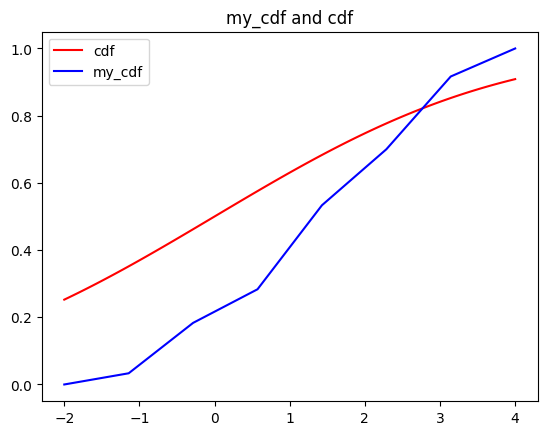

In [246]:
# fig, ax = plt.subplots()
# for i in range(0, len(arrayGraph)):
#     ax.hlines(y=arrayGraph[i], xmin=intervals[i], xmax=intervals[i+1], linewidth=2, color='r')
    
# ax.hlines(y=1, xmin=intervals[len(intervals)-1], xmax=intervals[len(intervals)-1]+10, linewidth=2, color='r')
# ax.hlines(y=0, xmin=intervals[0]-10, xmax=intervals[0], linewidth=2, color='r')
# plt.plot(x, sts.norm.cdf(x, a, sigma))

x = np.linspace(min_smpl, max_smpl, 100)
plt.plot(x, sts.norm.cdf(x, a, sigma), color="red")

plt.plot(cdfX, cdfY, color="blue")
plt.legend(['cdf', 'my_cdf'])
plt.title("my_cdf and cdf")
plt.show()

,X
0.25,0.078815
0.50,1.217766
0.75,2.312084


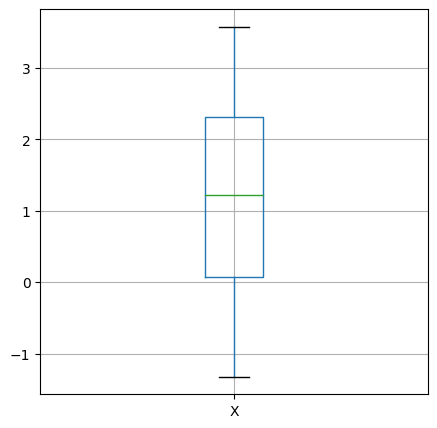

In [247]:
df = pd.DataFrame(data=sample,columns=['X'])
df.boxplot(figsize = (5, 5))
df.quantile([0.25,0.5,0.75])

part 3


In [248]:
print(q)
print(f"Вероятность по таблице {0.04599*2}")
print(f"Вероятность по lib {sts.laplace(scale=sigma).pdf(q)}")
prob = 0
for i in sample:
    if i>-q and i<q:
        prob+=1
prob/=n
print(f"Статистическая {prob}")


1.75
Вероятность по таблице 0.09198
Вероятность по lib 0.09300585762834118
Статистическая 0.6166666666666667


In [249]:
tem1 = frequency/n
sample 

my_mean = statistics.mean(sample)
my_variacne = statistics.variance(sample)
my_dev = math.sqrt(my_variacne)
my_skewness = sts.skew(sample)
my_kurtosis = sts.kurtosis(sample)
print(f'mean - {my_mean}, \nvariacne - {my_variacne}, \ndev - {my_dev}, \nSkewness - {my_skewness}, \nKurtosis - {my_kurtosis}')


mean - 1.2348500150323047, 
variacne - 1.8532785365697408, 
dev - 1.36135173139411, 
Skewness - -0.14493586595304417, 
Kurtosis - -1.0030177186708613


In [250]:
X = sample.sum()/len(sample)
print(f'Первый эмпирический момент: {X}')
s2 = 0
for i in sample:
    s2 += (i-X)**2
s2 = s2/len(sample)
print(f'Эмпирическая дисперсия: {s2}')
print(f'Стандартное отклонение: {math.sqrt(s2)}')

x4 = 0
s3 = 0
s4 = 0
for i in sample:
    x4 += math.pow(i, 4)
    s3 += math.pow((i-X), 3)
    s4 += math.pow((i-X), 4)
x4 /= len(sample)
s3 /= len(sample)
s4 /= len(sample)
print(f'Коэффициент ассимметрии: {s3/math.pow(math.sqrt(s2), 3)}')
print(f'Коэффициент эксцесса: {s4/math.pow(s2, 2)-3}')

Первый эмпирический момент: 1.2348500150323045
Эмпирическая дисперсия: 1.8223905609602455
Стандартное отклонение: 1.3499594664138053
Коэффициент ассимметрии: -0.14493586595304395
Коэффициент эксцесса: -1.0030177186708629


Part II
---
